In [0]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import seaborn as sns
from matplotlib import rcParams

In [0]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10, 7

In [0]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [4]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0] / table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0] / table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


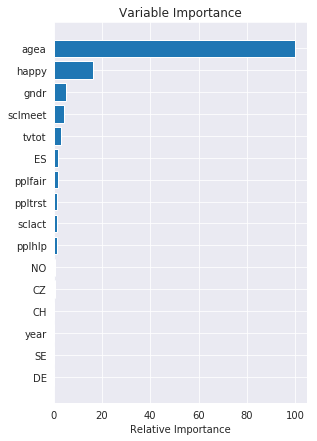

In [5]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [6]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
df.shape

(8147, 13)

In [8]:
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


In [9]:
X.shape

(8147, 16)

In [10]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: partner, dtype: float64

In [11]:
y.shape

(8147,)

In [12]:
X.agea.describe()

count    8147.000000
mean       47.262182
std        18.316890
min        15.000000
25%        33.000000
50%        47.000000
75%        61.000000
max       114.000000
Name: agea, dtype: float64

In [13]:
X.happy.describe()

count    8147.000000
mean        7.708482
std         1.720839
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: happy, dtype: float64

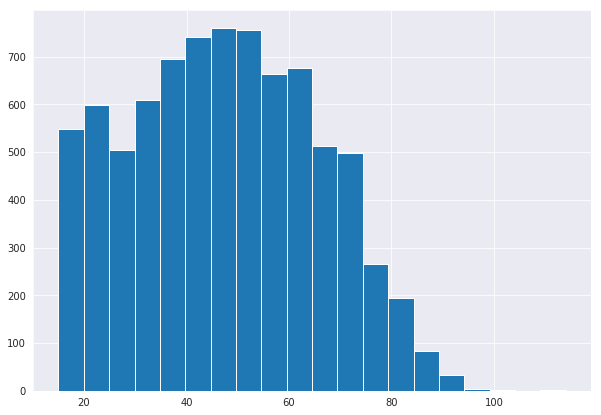

In [14]:
X['agea'].hist(bins=20)

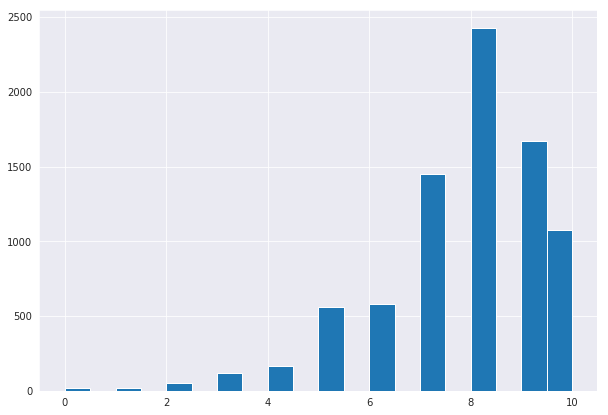

In [15]:
X['happy'].hist(bins=20)

In [16]:
clf.score(X_test, y_test)

0.7521472392638037

Text(0, 0.5, 'Age')

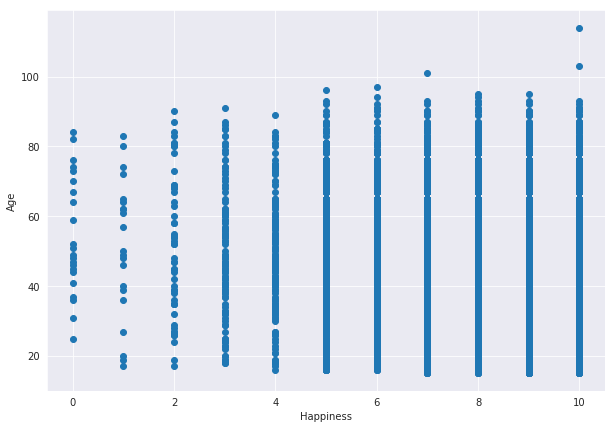

In [17]:
plt.scatter(X.happy, X.agea)
plt.xlabel('Happiness')
plt.ylabel('Age')

In [0]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(clf, X, y, cv=10)

In [19]:
print(score)
print()
print(score.mean())

[0.7622549  0.7120098  0.71691176 0.72760736 0.77272727 0.76904177
 0.72727273 0.74447174 0.76412776 0.74692875]

0.744335385712145


In [0]:
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)

In [0]:
score = cross_val_score(clf, X, y, cv=10)

In [22]:
print(score)
print()
print(score.mean())

[0.77205882 0.71323529 0.67034314 0.70674847 0.74570025 0.73710074
 0.73587224 0.58108108 0.72113022 0.73832924]

0.7121599480373388


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=.5)

In [25]:
clf.fit(X_train, y_train)

ValueError: ignored

In [26]:
X.shape

(8147, 16)

In [27]:
y.shape

(8147,)

In [28]:
X_train.shape

(4073, 16)

In [29]:
y_train.shape

(4074, 16)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
print(X_train.shape)
print(y_train.shape)

(5702, 16)
(5702,)


In [31]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [32]:
clf.score(X_test, y_test)

0.7316973415132925

In [0]:
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1307,  226],
       [ 430,  482]])

In [35]:
print('Type I:', 208/8147)

Type I: 0.02553087025899104


In [36]:
print('Type II:', 446/8147)

Type II: 0.054744077574567326


In [38]:
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'exponential'}

clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)

y_pred = clf.predict(X_test)

print(score)

print()
confusion_matrix(y_test, y_pred)



0.7357873210633947



array([[1308,  225],
       [ 421,  491]])

In [39]:
print('Type I:', 225/8147)
print('Type II:', 421/8147)

Type I: 0.027617527924389346
Type II: 0.051675463360746285
